### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import spacy
import nltk


from gensim.models import Word2Vec
import gensim

/Users/kapeleshh/.conda/envs/STS/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  after removing the cwd from sys.path.
/Users/kapeleshh/.conda/envs/STS/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
#nltk.download('words')

### Load Data

In [3]:
filepath = "/Users/kapeleshh/PycharmProjects/STS/"
xls =  pd.ExcelFile(filepath + "data/dataset_JA_Clinical_STS.xls")
df = xls.parse(0)

In [4]:
df.columns = ['s1', 's2', 'score']

In [5]:
df.head()

,s1,s2,score
0,"口側の腸管は拡張し,暗赤色を呈していたが,壊死には陥っていなかった",標本造影では尾側膵管は嚢胞状に拡張していたが、明らかな乳頭状隆起像は描出されなかった,0
1,"これらの症例を報告するとともに,それぞれの臨床像について文献的考察を加え検討した",loss型の内耳性難聴であつた．本症例の報告とともに本症候群の難聴成因について文献的考察を行...,0
2,"また,左心耳内には輝度の低い血栓を疑う構造物を認めた","また,左心耳には輝度の低い血栓を疑う構造物を認めた",5
3,8)診断及び治療方針:診断は、下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴...,7)診断及び治療方針:下顎骨の過成長による骨格性反対咬合の症例で、上顎前歯部の叢生を伴うもの...,5
4,約3年前より左足底に皮疹出現し漸次拡大したため当科を受診した,約3年前より左足背に皮疹が出現し漸次拡大したため当科を受診した,3


### Value Counts

In [6]:
a = df.score.value_counts().reset_index()

<AxesSubplot:>

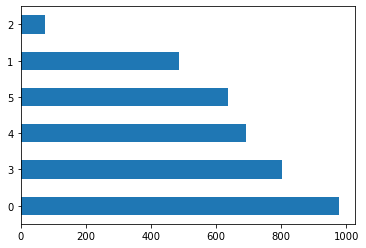

In [7]:
df.score.value_counts().plot(kind = 'barh')

In [8]:
from cleaning import *
df['s1'] = cleaning(df['s1'])
df['s2'] = cleaning(df['s2'])

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

  0%|          | 0/3669 [00:00<?, ?it/s]

In [9]:
df.head()

,s1,s2,score
0,口側の腸管は拡張し 暗赤色を呈していたが 壊死には陥っていなかった,標本造影では尾側膵管は嚢胞状に拡張していたが明らかな乳頭状隆起像は描出されなかった,0
1,これらの症例を報告するとともに それぞれの臨床像について文献的考察を加え検討した,loss型の内耳性難聴であつた．本症例の報告とともに本症候群の難聴成因について文献的考察を行...,0
2,また 左心耳内には輝度の低い血栓を疑う構造物を認めた,また 左心耳には輝度の低い血栓を疑う構造物を認めた,5
3,8 診断及び治療方針 診断は下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴うとした,7 診断及び治療方針 下顎骨の過成長による骨格性反対咬合の症例で上顎前歯部の叢生を伴うものと...,5
4,約3年前より左足底に皮疹出現し漸次拡大したため当科を受診した,約3年前より左足背に皮疹が出現し漸次拡大したため当科を受診した,3


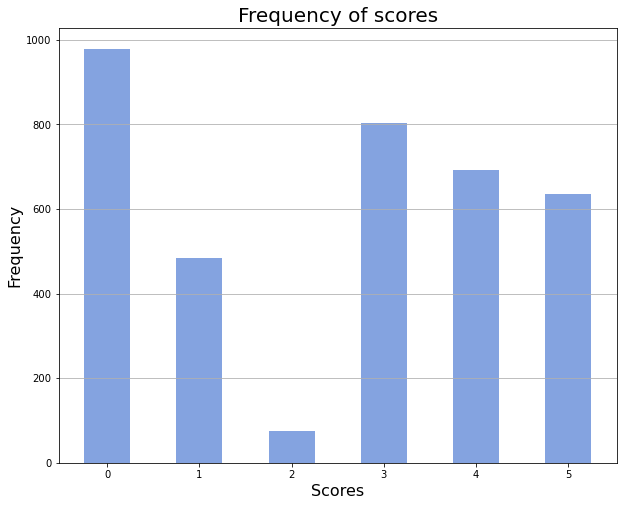

In [10]:
fig = plt.figure(figsize = (10, 8))
plt.bar(a['index'], a['score'], color=(0.2, 0.4, 0.8, 0.6), width = 0.5)
plt.title("Frequency of scores", fontsize = 20)
plt.xlabel("Scores", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)
plt.grid(axis='y')
plt.show()

In [11]:
df_score = df['score']
df = df.drop(['score'], axis=1)
#df_s1 = df[['s1']]
#df_s2 = df[['s2']]


## Tokenize

In [12]:
from tokenizers import *
df_sudachi = surface_sudachitokens(df)

0 s1
1 s1
2 s1
3 s1
4 s1
5 s1
6 s1
7 s1
8 s1
9 s1
10 s1
11 s1
12 s1
13 s1
14 s1
15 s1
16 s1
17 s1
18 s1
19 s1
20 s1
21 s1
22 s1
23 s1
24 s1
25 s1
26 s1
27 s1
28 s1
29 s1
30 s1
31 s1
32 s1
33 s1
34 s1
35 s1
36 s1
37 s1
38 s1
39 s1
40 s1
41 s1
42 s1
43 s1
44 s1
45 s1
46 s1
47 s1
48 s1
49 s1
50 s1
51 s1
52 s1
53 s1
54 s1
55 s1
56 s1
57 s1
58 s1
59 s1
60 s1
61 s1
62 s1
63 s1
64 s1
65 s1
66 s1
67 s1
68 s1
69 s1
70 s1
71 s1
72 s1
73 s1
74 s1
75 s1
76 s1
77 s1
78 s1
79 s1
80 s1
81 s1
82 s1
83 s1
84 s1
85 s1
86 s1
87 s1
88 s1
89 s1
90 s1
91 s1
92 s1
93 s1
94 s1
95 s1
96 s1
97 s1
98 s1
99 s1
100 s1
101 s1
102 s1
103 s1
104 s1
105 s1
106 s1
107 s1
108 s1
109 s1
110 s1
111 s1
112 s1
113 s1
114 s1
115 s1
116 s1
117 s1
118 s1
119 s1
120 s1
121 s1
122 s1
123 s1
124 s1
125 s1
126 s1
127 s1
128 s1
129 s1
130 s1
131 s1
132 s1
133 s1
134 s1
135 s1
136 s1
137 s1
138 s1
139 s1
140 s1
141 s1
142 s1
143 s1
144 s1
145 s1
146 s1
147 s1
148 s1
149 s1
150 s1
151 s1
152 s1
153 s1
154 s1
155 s1
156 s1
157 s1
158 

### StopWords

### Load Data for Japanese stopwords

In [13]:
file1 = open(filepath + "stopwords/Japanese_stopword_list.txt")
line = file1.read()
stopJa = line.split()

### Load English Stop words

In [14]:
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
eng_words = set(nltk.corpus.words.words())

en_alphabets = ['o','q','w','e','r','t','y','u','i','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m']
sw_spacy.update(en_alphabets)


In [15]:
cols = df_sudachi.columns
df_sudachi = stopwords_removal(df_sudachi, cols, sw_spacy, stopJa, eng_words)


s1 0
s1 1
s1 2
s1 3
s1 4
s1 5
s1 6
s1 7
s1 8
s1 9
s1 10
s1 11
s1 12
s1 13
s1 14
s1 15
s1 16
s1 17
s1 18
s1 19
s1 20
s1 21
s1 22
s1 23
s1 24
s1 25
s1 26
s1 27
s1 28
s1 29
s1 30
s1 31
s1 32
s1 33
s1 34
s1 35
s1 36
s1 37
s1 38
s1 39
s1 40
s1 41
s1 42
s1 43
s1 44
s1 45
s1 46
s1 47
s1 48
s1 49
s1 50
s1 51
s1 52
s1 53
s1 54
s1 55
s1 56
s1 57
s1 58
s1 59
s1 60
s1 61
s1 62
s1 63
s1 64
s1 65
s1 66
s1 67
s1 68
s1 69
s1 70
s1 71
s1 72
s1 73
s1 74
s1 75
s1 76
s1 77
s1 78
s1 79
s1 80
s1 81
s1 82
s1 83
s1 84
s1 85
s1 86
s1 87
s1 88
s1 89
s1 90
s1 91
s1 92
s1 93
s1 94
s1 95
s1 96
s1 97
s1 98
s1 99
s1 100
s1 101
s1 102
s1 103
s1 104
s1 105
s1 106
s1 107
s1 108
s1 109
s1 110
s1 111
s1 112
s1 113
s1 114
s1 115
s1 116
s1 117
s1 118
s1 119
s1 120
s1 121
s1 122
s1 123
s1 124
s1 125
s1 126
s1 127
s1 128
s1 129
s1 130
s1 131
s1 132
s1 133
s1 134
s1 135
s1 136
s1 137
s1 138
s1 139
s1 140
s1 141
s1 142
s1 143
s1 144
s1 145
s1 146
s1 147
s1 148
s1 149
s1 150
s1 151
s1 152
s1 153
s1 154
s1 155
s1 156
s1 157
s1 1

In [4]:
from wikipedia2vec import Wikipedia2Vec
wiki2vec = Wikipedia2Vec.load(filepath + 'models/jawiki_20180420_300d.pkl')


In [20]:
for j in range(df_sudachi.columns.shape[0]):
    for i in range(df_sudachi.shape[0]):
        for k in range(len(df_sudachi.iloc[i,j])):
            try:
                df_sudachi.iloc[i,j][k] = wiki2vec.get_word_vector(df_sudachi.iloc[i,j][k])
            except ValueError:
                df_sudachi.iloc[i,j][k] = wiki2vec.get_entity_vector(df_sudachi.iloc[i,j][k])

KeyError: 